In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from tqdm import tqdm

# NMSSM points sampled for $\kappa = A_{\kappa}=0$ --- using 1-loop analytic expression from 1703.07800

In [2]:
nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/sampling_points_expressions_1703p07800.csv')
nmssmDF.head(3)

,tb,M,mA,n,lam,s11,s22,s33
0,1,1000,0,0,0.01,-5648.544306,10478.717318,5949.583101
1,1,1000,0,0,0.11,-74672.292979,78550.099464,6901.949628
2,1,1000,0,0,0.21,-143742.759282,148582.004552,5940.510843


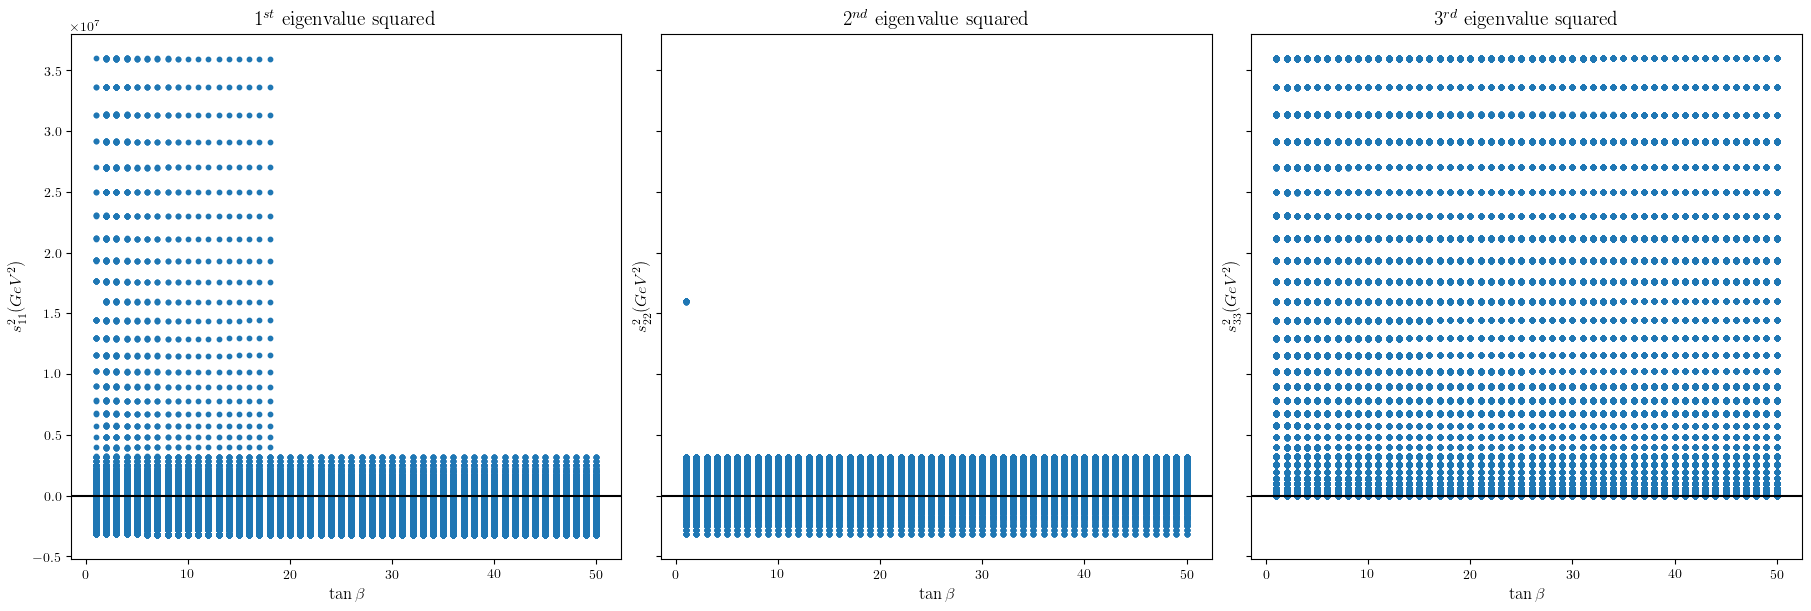

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

scatter1 = axes[0].scatter(nmssmDF['tb'], nmssmDF['s11'],s=10)
axes[0].set_title(r'$1^{st}$ eigenvalue squared', fontsize=14)
axes[0].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2 (GeV^2)$', fontsize=12)
axes[0].axhline(y=0, color='black')

scatter2 = axes[1].scatter(nmssmDF['tb'], nmssmDF['s22'],s=10)
axes[1].set_title(r'$2^{nd}$ eigenvalue squared', fontsize=14)
axes[1].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[1].set_ylabel(r'$s_{22}^2 (GeV^2)$', fontsize=12)
axes[1].axhline(y=0, color='black')

scatter3 = axes[2].scatter(nmssmDF['tb'], nmssmDF['s33'],s=10)
axes[2].set_title(r'$3^{rd}$ eigenvalue squared', fontsize=14)
axes[2].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[2].set_ylabel(r'$s_{33}^2 (GeV^2)$', fontsize=12)
axes[2].axhline(y=0, color='black')

plt.show()


In [6]:
posDF = nmssmDF[(nmssmDF['s11'] >= 0) & (nmssmDF['s22'] >= 0) & (nmssmDF['s33'] >= 0)]
posDF.head(2)

,tb,M,mA,n,lam,s11,s22,s33
1400,1,1000,4000,0,0.01,3505.323463,1.600727e+07,3.0258
1401,1,1000,4000,0,0.11,3868.419441,1.600691e+07,366.1218


- From this dataframe we get that only for $tan \beta =1$ or $2$ we have all three eigenvalues positive. We also get that for $\tan \beta = 1$ we only have $m_A = 4000GeV$ and for $\tan \beta =2$ we only have $m_A=5000GeV$. 

In [7]:
np.unique(posDF[(posDF['tb'] == 2)]['lam'])

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

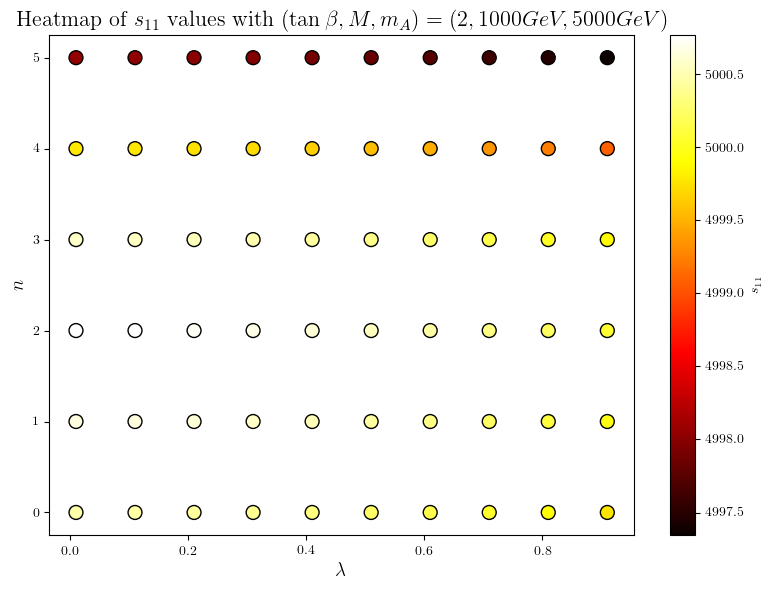

In [8]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==5000)]['lam'], posDF[(posDF['mA']==5000)]['n'], c=np.sqrt(posDF[(posDF['mA']==5000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(2,1000GeV, 5000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

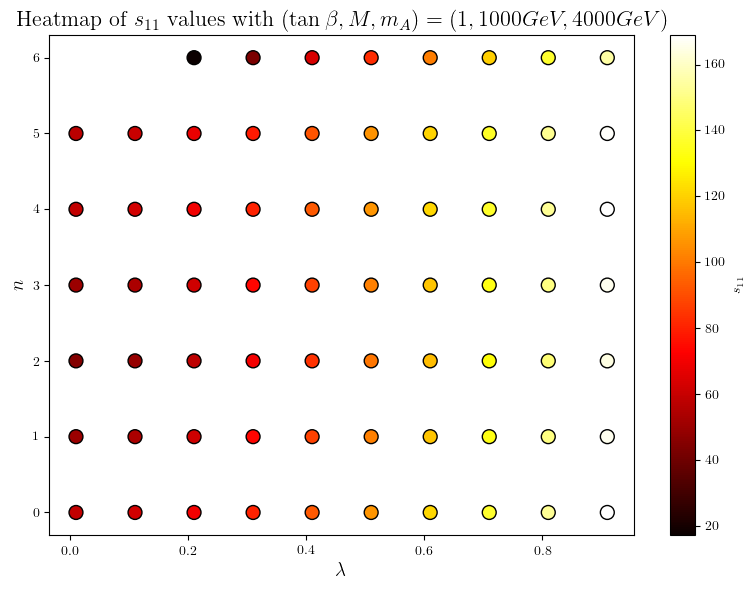

In [76]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==4000)]['lam'], posDF[(posDF['mA']==4000)]['n'], c=np.sqrt(posDF[(posDF['mA']==4000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(1,1000GeV, 4000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

## Plot eigenvalues as functions of $m_A$ keeping everything else fixed.

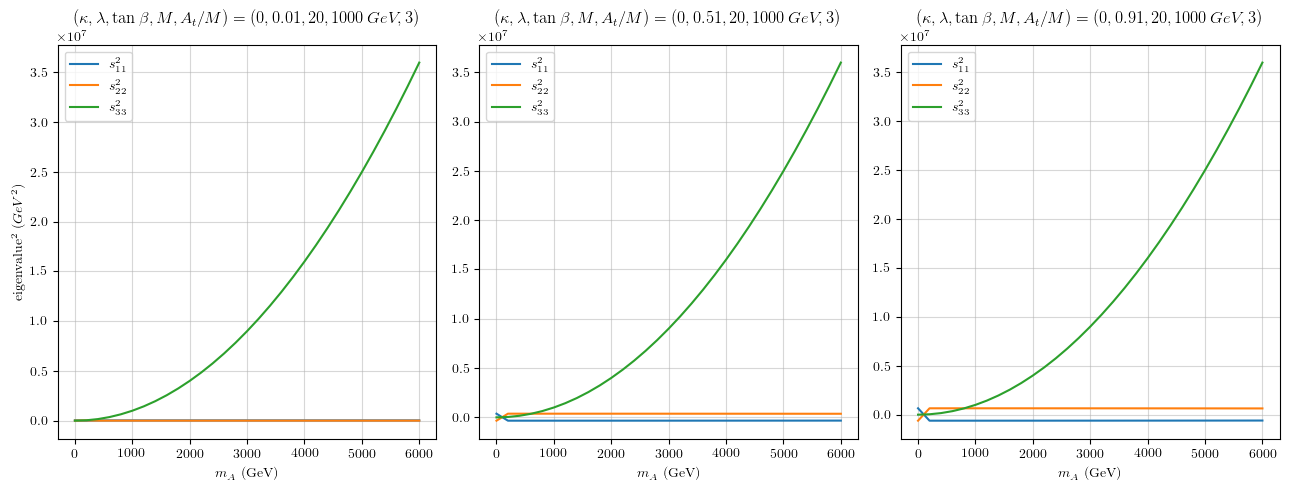

In [9]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_xlabel(r'$m_A$ (GeV)')
ax1.set_ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$')
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.01,20,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_xlabel(r'$m_A$ (GeV)')
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_xlabel(r'$m_A$ (GeV)')
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()


# Adjust layout
plt.tight_layout()

# Save and show the figure
#plt.savefig("", format="pdf", bbox_inches="tight")
plt.show()


In [94]:
# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$', linestyle='--')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.01,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()


# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.51,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()

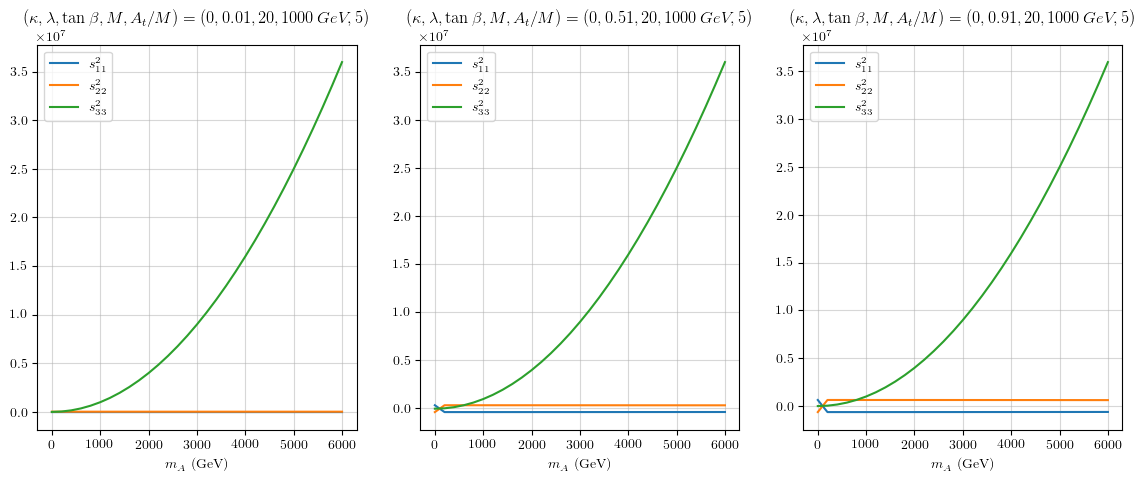

In [10]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,20,1000 \,GeV, 5)$', fontsize=12)
ax1.set_xlabel(r'$m_A$ (GeV)')
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 5)$', fontsize=12)
ax2.set_xlabel(r'$m_A$ (GeV)')
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 5)$', fontsize=12)
ax3.set_xlabel(r'$m_A$ (GeV)')
ax3.legend()

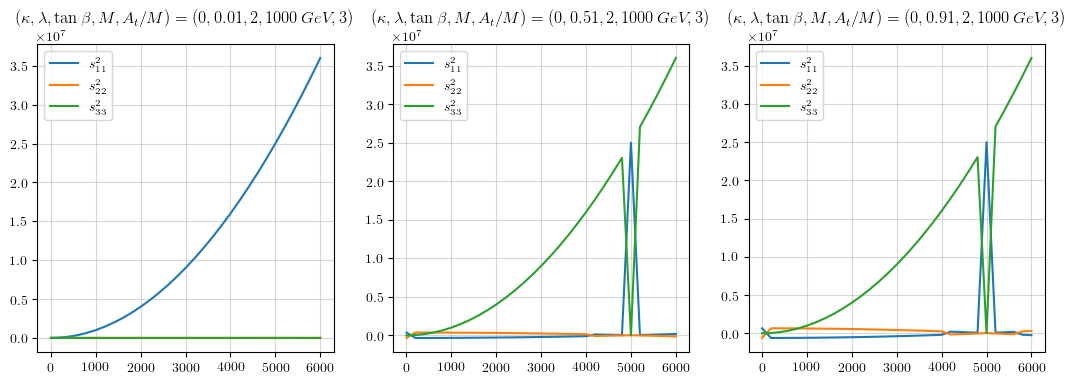

In [132]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,2,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()
#ax1.set_xlim(0,1000)
#ax1.set_ylim(-1e+6,1e+6)

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,2,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()
#ax2.set_xlim(0,1000)
#ax2.set_ylim(-1e+6,1e+6)

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,2,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()
#ax3.set_xlim(0,1000)
#ax3.set_ylim(-1e+6,1e+6)



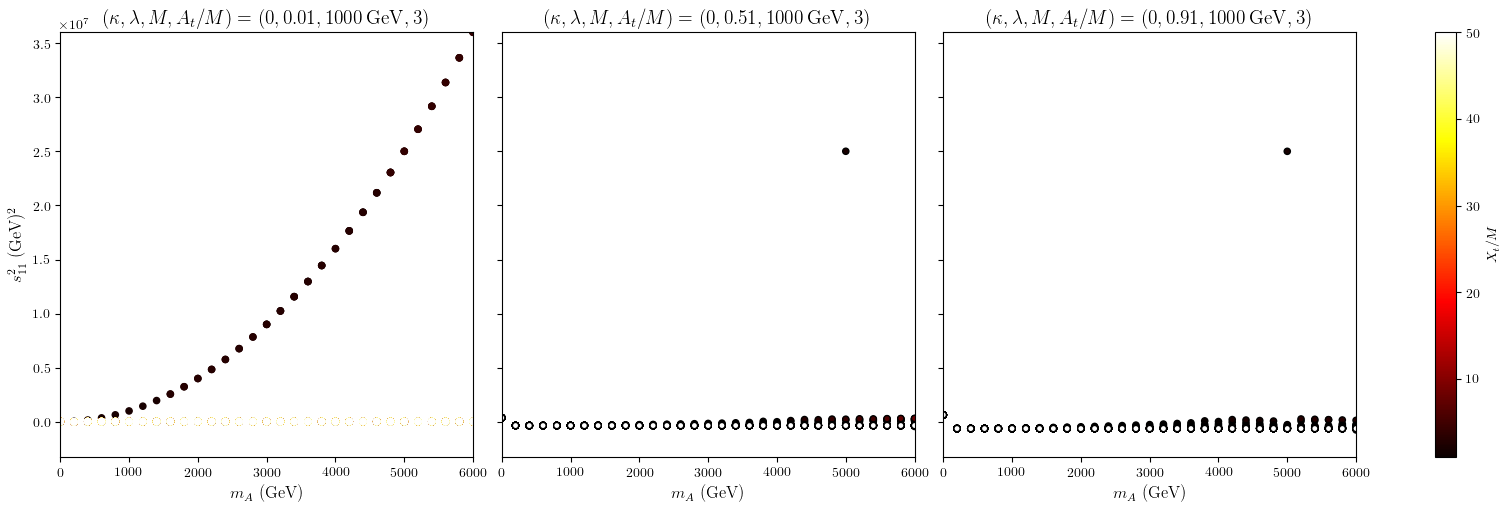

In [130]:
auxDF0p01 = nmssmDF[(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Plot each heatmap on its respective axis
scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s22'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s33'], c=auxDF0p01['tb'], cmap='hot', s=20)
axes[0].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.01,1000 \, \rm GeV, 3)$', fontsize=14)
axes[0].set_xlabel(r'$m_A$ (GeV) ', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2$ $(\rm GeV)^2$', fontsize=12)
axes[0].set_xlim(nmssmDF['mA'].min(), nmssmDF['mA'].max())
axes[0].set_ylim(nmssmDF['s11'].min(), nmssmDF['s11'].max())


scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s11'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s22'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s33'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')

axes[1].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.51,1000 \, \rm GeV, 3)$', fontsize=14)
axes[1].set_xlabel(r'$m_A$ (GeV)', fontsize=12)

scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s11'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s22'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s33'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')

axes[2].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.91,1000 \, \rm GeV, 3)$', fontsize=14)
axes[2].set_xlabel(r'$m_A$ (GeV)', fontsize=12)


# Add a single colorbar for all plots
fig.colorbar(scatter1, ax=axes, location='right', label=r'$X_t/M$')
#plt.ylim(0.1,1)
# Display the plot
plt.show()



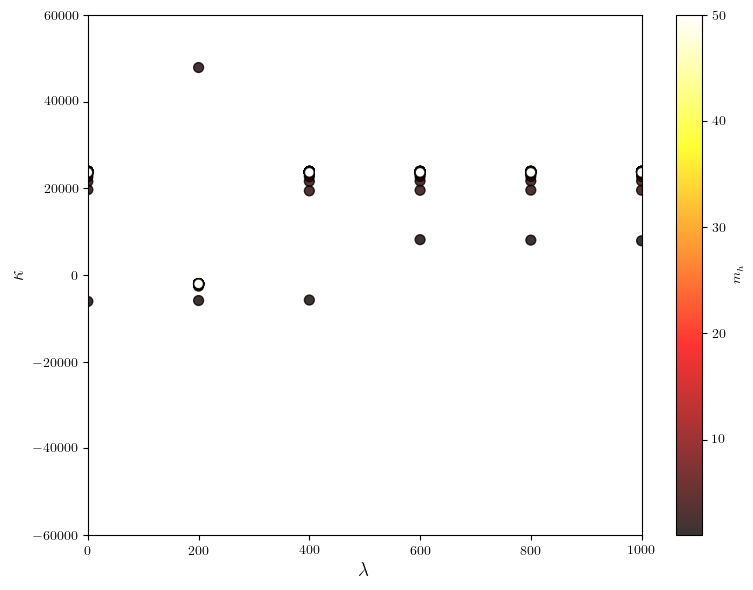

In [127]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot',s=50,  edgecolor='k', alpha=0.8)
plt.colorbar(scatter, label=r'$m_h$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$\kappa$', fontsize=14)
plt.ylim(-60e+3,60e+3)
plt.xlim(0,1000)
plt.tight_layout()
plt.show()

# Plot $A_t /M$ Vs $\lambda$ for a few $\tan \beta$ values with $\kappa = 0$ including all the sampled $m_A$ values 

In [5]:
DFtanb2 = nmssmDF[(nmssmDF['tb'] == 2)]
DFtanb20 = nmssmDF[(nmssmDF['tb'] == 20)]
DFtanb50= nmssmDF[(nmssmDF['tb'] == 50)]

### $M=1000 \, GeV$

In [10]:
DFtanb2M1000 = DFtanb2[DFtanb2['M'] == 1000]
DFtanb20M1000 = DFtanb20[DFtanb20['M'] == 1000]
DFtanb50M1000 = DFtanb50[DFtanb50['M'] == 1000]

In [33]:
# # Separate positive and negative values
# positive_s11 = DFtanb2M1000['s11'] > 0
# negative_s11 = DFtanb2M1000['s11'] < 0

# # Transform values to log scale
# log_positive = np.log10(np.clip(DFtanb2M1000.loc[positive_s11, 's11'], a_min=1e-10, a_max=None))
# log_negative = np.log10(np.clip(-DFtanb2M1000.loc[negative_s11, 's11'], a_min=1e-10, a_max=None))

# # Create the figure and axes
# fig, ax = plt.subplots(figsize=(6, 4))

# # Plot positive values
# scatter_pos = ax.scatter(
#     DFtanb2M1000.loc[positive_s11, 'n'], 
#     DFtanb2M1000.loc[positive_s11, 'lam'], 
#     c=log_positive, cmap='Reds', s=50, edgecolor='k', alpha=0.8, marker='s'
# )

# # Plot negative values
# scatter_neg = ax.scatter(
#     DFtanb2M1000.loc[negative_s11, 'n'], 
#     DFtanb2M1000.loc[negative_s11, 'lam'], 
#     c=log_negative, cmap='Blues', s=50, edgecolor='k', alpha=0.1
# )

# # Add separate colorbars
# cbar_pos = plt.colorbar(scatter_pos, ax=ax, label=r'$\log_{10}(s_{11}^2)$ (positive)')
# cbar_neg = plt.colorbar(scatter_neg, ax=ax, label=r'$\log_{10}(-s_{11}^2)$ (negative)', pad=0.15)

# # Add labels and adjust layout
# ax.set_xlabel(r'$A_t / M$', fontsize=14)
# ax.set_ylabel(r'$\lambda$', fontsize=14)
# plt.tight_layout()
# plt.show()


In [42]:
# # Filter points where s11 > 0
# positive_points = DFtanb2M1000[DFtanb2M1000['s11'] > 0]

# # Further filter points where s22 >= 0 and s33 >= 0 --- Just require three positive eigenvalues no restriction on the order

# # highlighted_points = positive_points[
# #     (positive_points['s22'] >= 0) & 
# #     (positive_points['s33'] >= 0)
# # ]
# # Further filter points where s33 > s11 > 0 and s22 > s11 > 0 --- Require the necessary ordering for the SM higgs to work
# highlighted_points = positive_points[
#     (positive_points['s33'] > positive_points['s11']) & 
#     (positive_points['s22'] > positive_points['s11'])
# ]

# # Plotting the heat map
# plt.figure(figsize=(8, 6))

# # Plot all positive points
# scatter = plt.scatter(
#     positive_points['n'], 
#     positive_points['lam'], 
#     c=positive_points['s11'], 
#     cmap='hot', 
#     s=50, 
#     edgecolor='k', 
#     alpha=0.8,
#     label='s11 > 0'
# )

# # Highlight points with s22 >= 0 and s33 >= 0 using square markers
# highlight_scatter = plt.scatter(
#     highlighted_points['n'], 
#     highlighted_points['lam'], 
#     c=highlighted_points['s11'],  # Use the same color mapping
#     cmap='hot',                   # Same colormap
#     s=80,                         # Larger marker size
#     marker='s',                   # Square marker
#     edgecolor='k',                # Keep the edge color consistent
#     alpha=0.8
# )

# plt.colorbar(scatter, label=r'$s_{11}^2$')
# plt.xlabel(r'$A_t / M$', fontsize=14)
# plt.ylabel(r'$\lambda$', fontsize=14)
# plt.title(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
# #plt.legend([r'$s_{11}^2 \leq 0$', r'$s_{22}^2 \leq 0$, $s_{33}^2 \leq 0$'], loc='upper right')
# plt.tight_layout()
# plt.show()


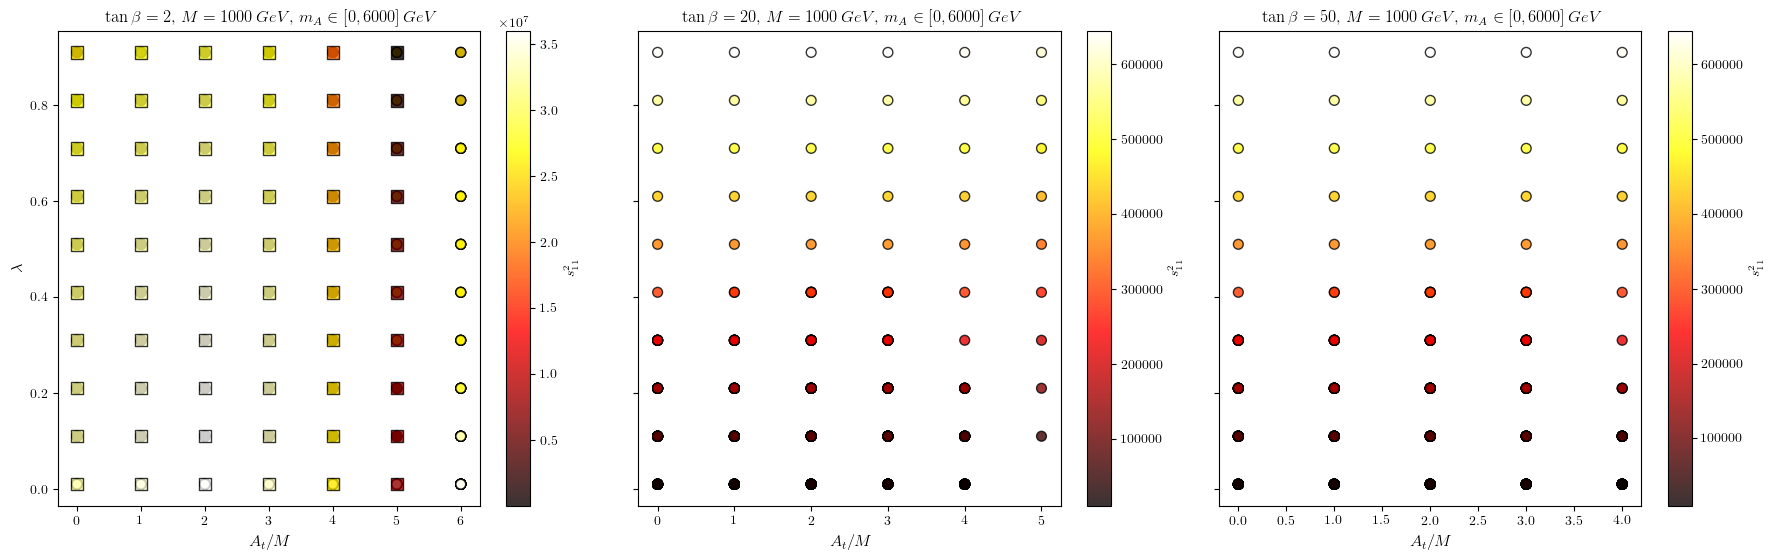

In [41]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M1000[DFtanb2M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M1000[DFtanb20M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M1000[DFtanb50M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### $M=2000 \, GeV$

In [43]:
DFtanb2M2000 = DFtanb2[DFtanb2['M'] == 2000]
DFtanb20M2000 = DFtanb20[DFtanb20['M'] == 2000]
DFtanb50M2000 = DFtanb50[DFtanb50['M'] == 2000]

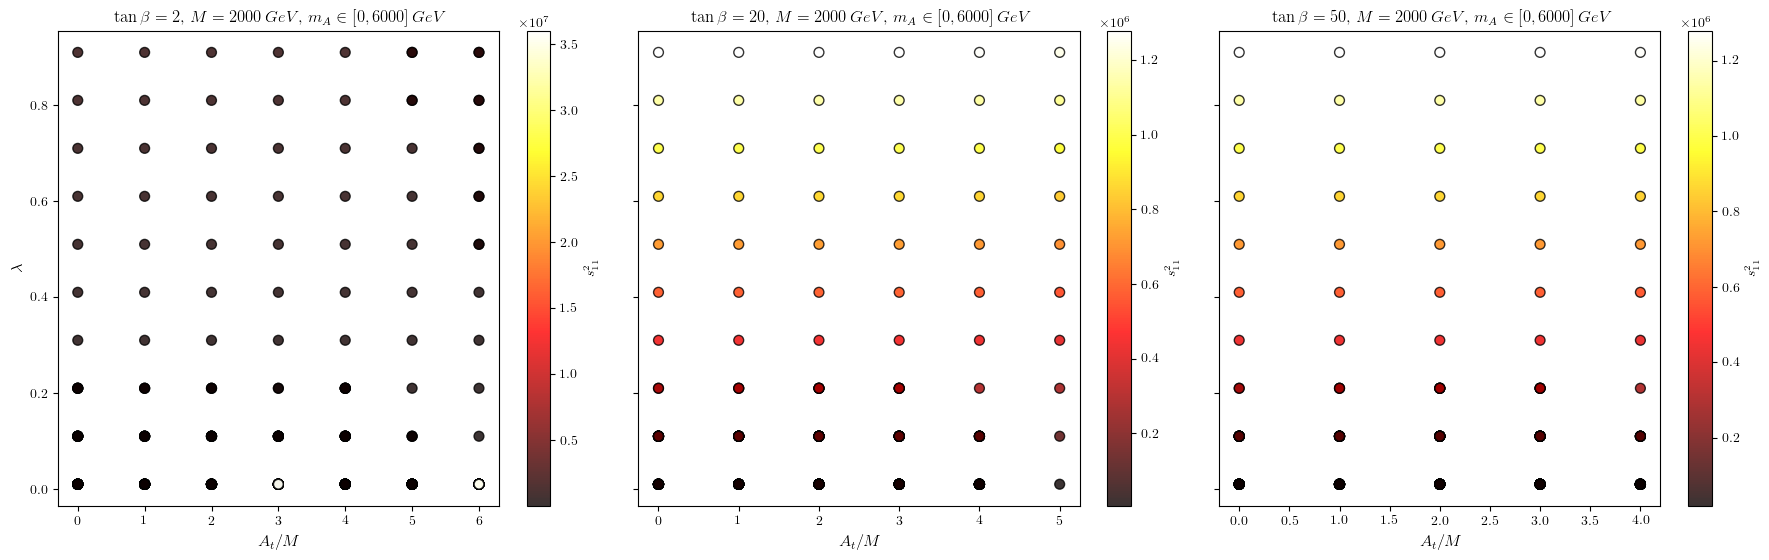

In [44]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M2000[DFtanb2M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M2000[DFtanb20M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M2000[DFtanb50M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### $M=5000 \, GeV$

In [45]:
DFtanb2M5000 = DFtanb2[DFtanb2['M'] == 5000]
DFtanb20M5000 = DFtanb20[DFtanb20['M'] == 5000]
DFtanb50M5000 = DFtanb50[DFtanb50['M'] == 5000]

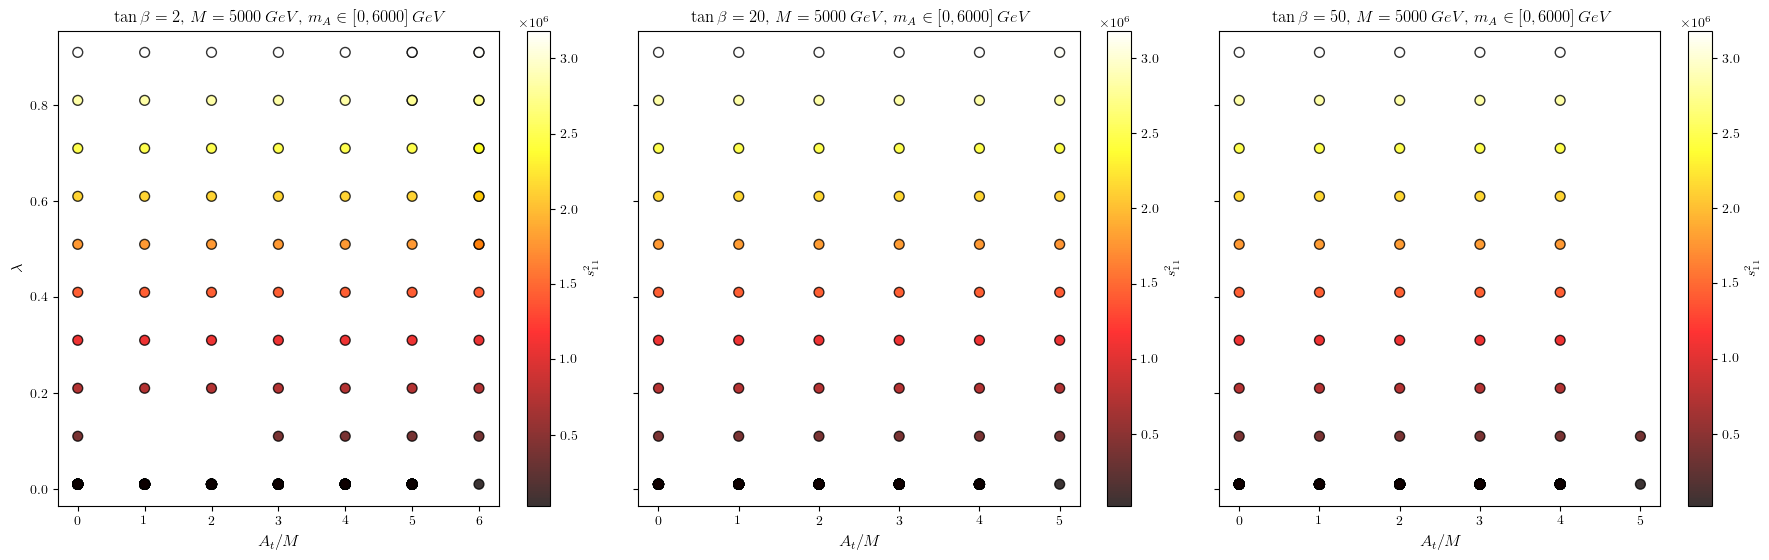

In [46]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M5000[DFtanb2M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M5000[DFtanb20M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M5000[DFtanb50M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# NMSSM points sampled for $\kappa ,  A_{\kappa} \neq 0$ --- using 1-loop analytic expression from 1703.07800

In [11]:
kappa_nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/nonzero_kappa_sampling_points_expressions_1703p07800.csv')
kappa_nmssmDF.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
0,1,1000,0,0,0.001,0.01,-1000,-4.098566e+04,2829.431533,8935.829190
1,1,1000,0,0,0.101,0.01,-1000,1.611960e+09,2059.331910,8719.931577


In [12]:
kappa_nmssmDF.shape

(21700000, 10)

In [27]:
aux2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'])]


- **From the figure below it seems like in the case of a full NMSSM (non zero $\kappa, A_{\kappa}$) things can possibly work!**

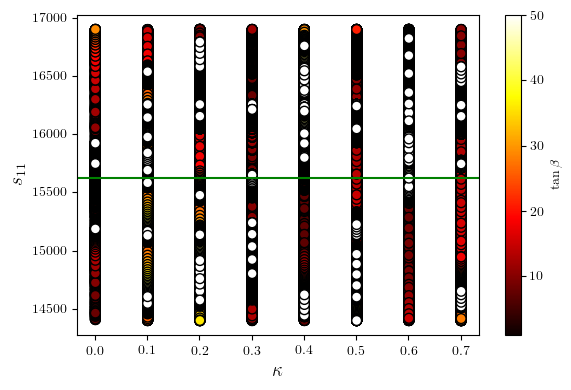

In [29]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(aux2['kappa'], aux2['s11'], c=aux2['tb'], cmap='hot',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$\tan \beta$')

plt.xlabel(r'$\kappa$', fontsize=14)
plt.ylabel(r'$s_{11}$', fontsize=14)
# plt.ylim(-60e+3,60e+3)
# plt.xlim(0,1000)
plt.axhline(y=125 * 125 , color='green')
plt.tight_layout()
plt.show()


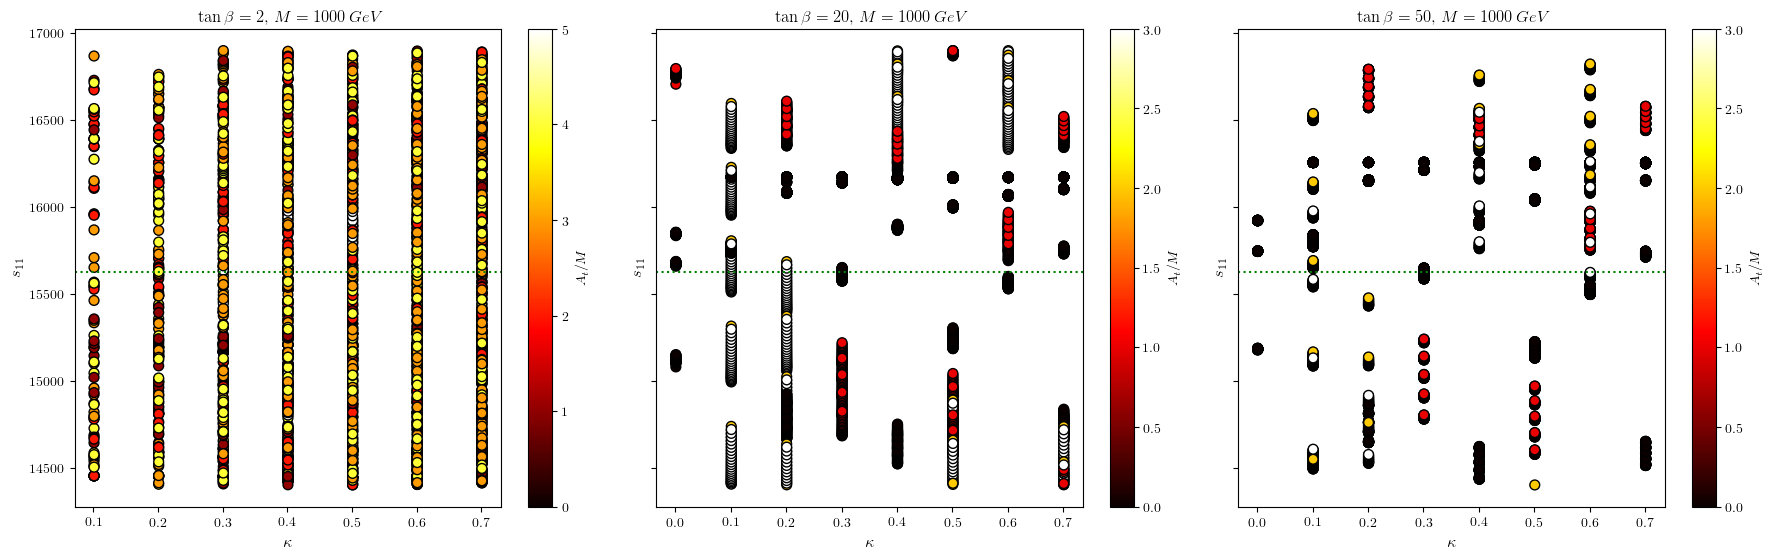

In [49]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)]
aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)]
aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], aux_tb2['s11'], c =  aux_tb2['n'], cmap='hot' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}$', fontsize=12)
axes[0].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$A_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], aux_tb20['s11'], c =  aux_tb20['n'], cmap='hot' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
axes[1].set_ylabel(r'$s_{11}$', fontsize=12)
axes[1].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], aux_tb50['s11'], c =  aux_tb50['n'], cmap='hot' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
axes[2].set_ylabel(r'$s_{11}$', fontsize=12)
axes[2].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


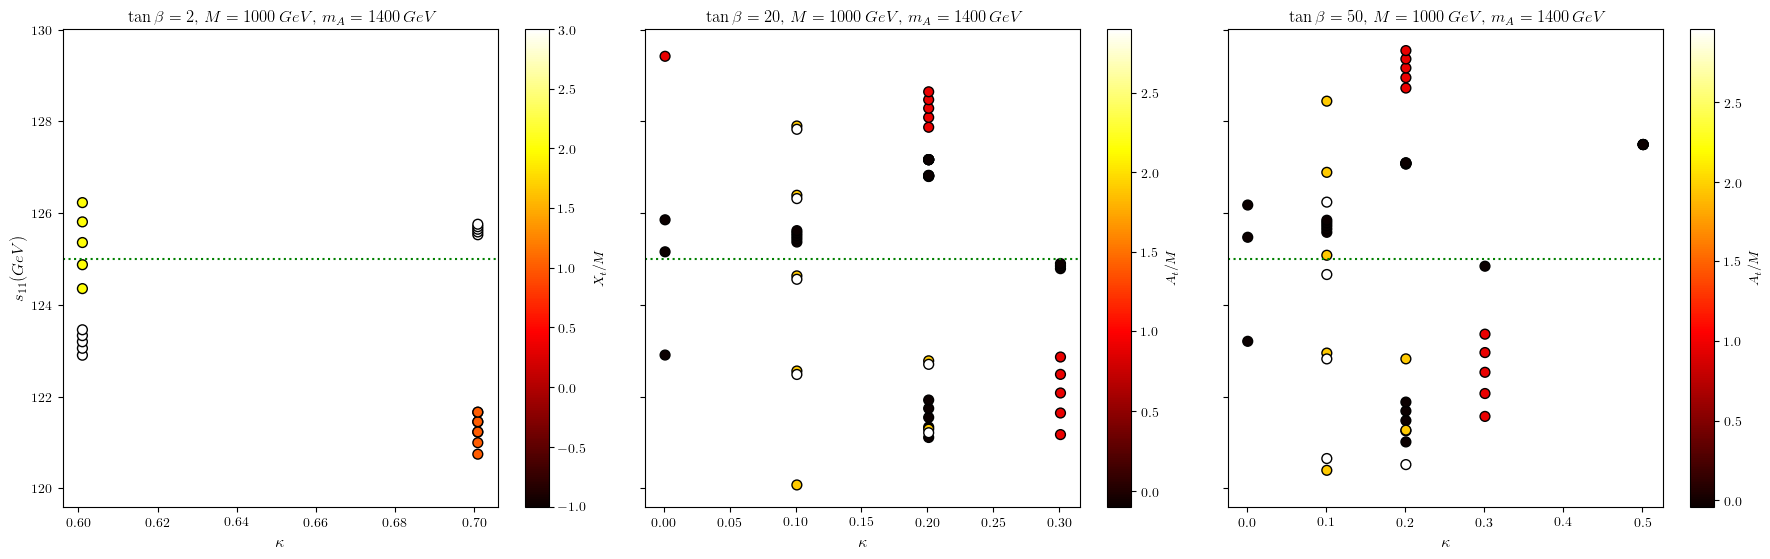

In [58]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb2['Xt/M'] = aux_tb2['n'] - 2/ 2

aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb20['Xt/M'] = aux_tb20['n'] - 2/ 20

aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb50['Xt/M'] = aux_tb50['n'] - 2/ 50


# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], np.sqrt(aux_tb2['s11']), c =  aux_tb2['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11} (GeV)$', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], np.sqrt(aux_tb20['s11']), c =  aux_tb20['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], np.sqrt(aux_tb50['s11']), c =  aux_tb50['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[2].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


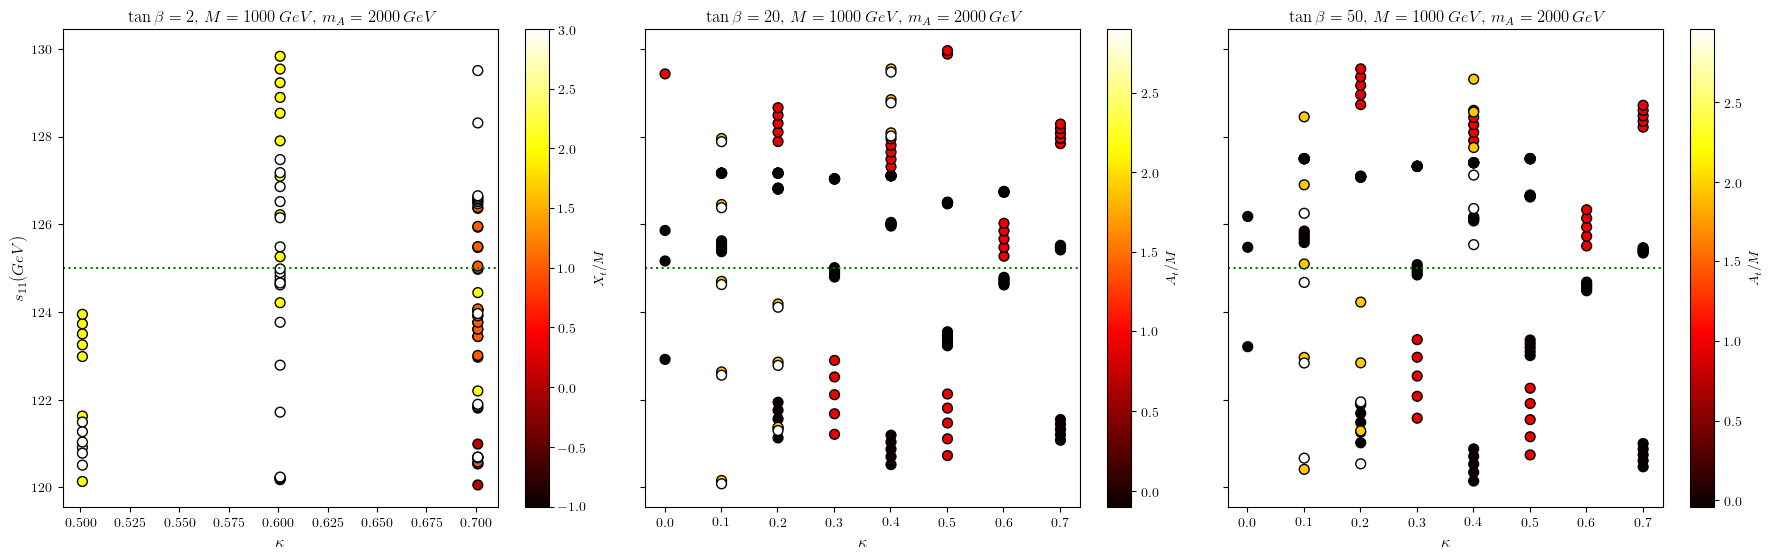

In [59]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb2['Xt/M'] = aux_tb2['n'] - 2/ 2

aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb20['Xt/M'] = aux_tb20['n'] - 2/ 20

aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb50['Xt/M'] = aux_tb50['n'] - 2/ 50


# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], np.sqrt(aux_tb2['s11']), c =  aux_tb2['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11} (GeV)$', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], np.sqrt(aux_tb20['s11']), c =  aux_tb20['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], np.sqrt(aux_tb50['s11']), c =  aux_tb50['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[2].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Based on the results I get for $3\sigma$ deviations from the SM detected at ILC500, I know what is the range of $(M,X_t/M)$ that I am interested in. 

In [82]:
aux_gen_tb2 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb2['Xt/M'] = aux_gen_tb2['n'] - 2 / 2

aux_gen_tb20 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb20['Xt/M'] = aux_gen_tb20['n'] - 2 / 20

aux_gen_tb50 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb50['Xt/M'] = aux_gen_tb50['n'] - 2 / 50 



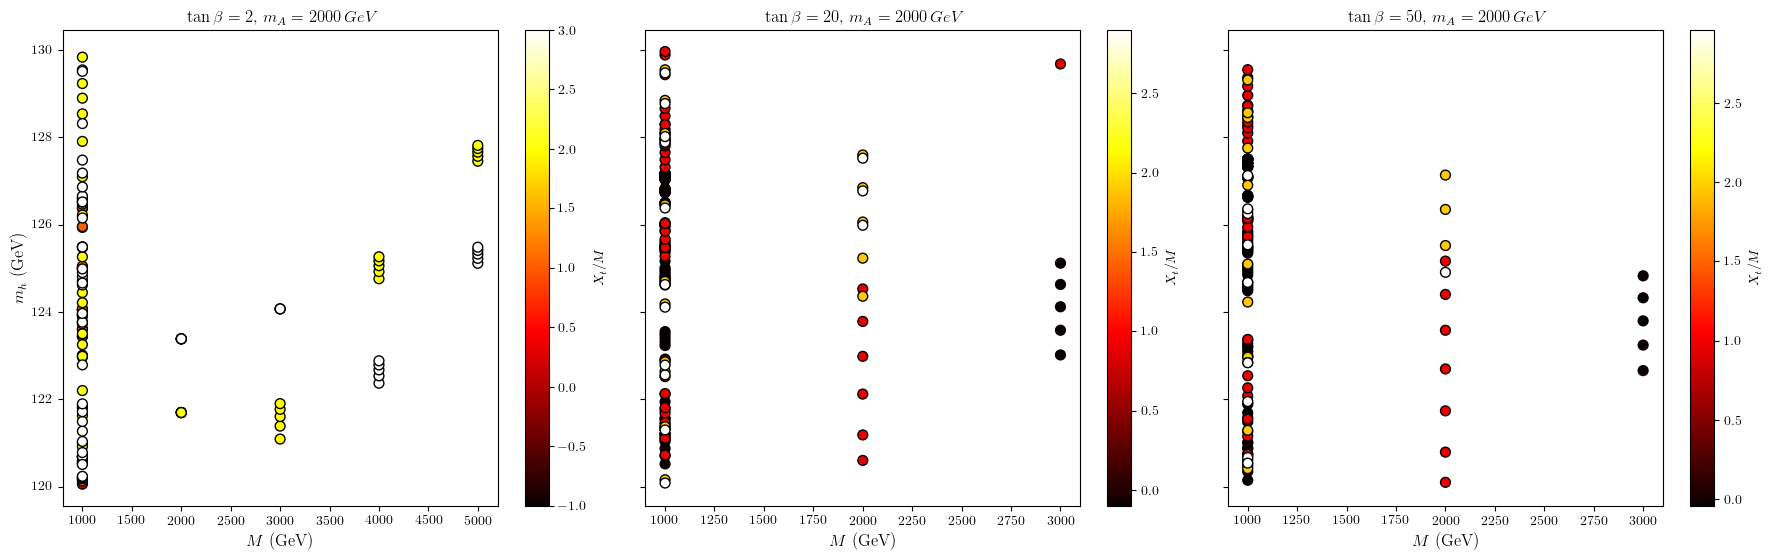

In [83]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_gen_tb2['M'], np.sqrt(aux_gen_tb2['s11']), c = aux_gen_tb2['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $m_A = 2000 \, GeV$')
axes[0].set_xlabel(r'$M$ (GeV)', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)

fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( aux_gen_tb20['M'], np.sqrt(aux_gen_tb20['s11']), c = aux_gen_tb20['Xt/M'], cmap='hot' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $m_A = 2000 \, GeV$')
axes[1].set_xlabel(r'$M$ (GeV)', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Panel 3
scatter3 = axes[2].scatter( aux_gen_tb50['M'], np.sqrt(aux_gen_tb50['s11']), c = aux_gen_tb50['Xt/M'] , cmap='hot' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$,  $m_A = 2000 \, GeV$')
axes[2].set_xlabel(r'$M$ (GeV)', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter3, ax=axes[2], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()